In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os, sys
# Add the parent directory (one level up) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

import warnings
warnings.filterwarnings("ignore")

from modules.inference import preprocessing, object_detection, nms

### Get data from the preprocessing module ###

In [2]:
#get data from a smaple video
video_path = "../storage/data/test_videos/Safety_Full_Hat_and_Vest.mp4"

data = []

for frames in preprocessing.capture_video(video_path):
    data.append(frames)

### Predict using object detection module ###

In [3]:
#predict the first five frames
first_five = data[5][5:10]

#load model
model = object_detection.Model()

#image outputs
image_outputs = []
images = []

#predict
for image in first_five:
    #get bbox prediction
    image_outputs.append(model.predict(image))
    #transpose image and collect for plotting
    image = np.transpose(image[0], (1, 2, 0))
    images.append(image)


### Create raw image bounding boxes for the 5 images ###

Plotting all the bounding boxes before thresholding.

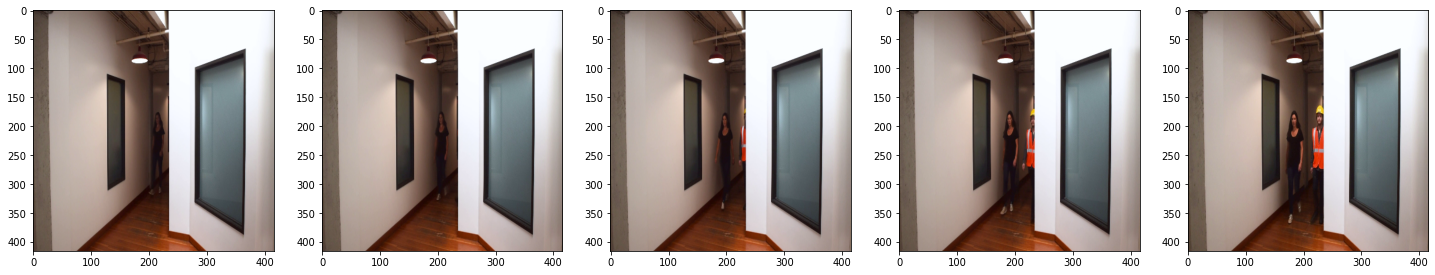

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


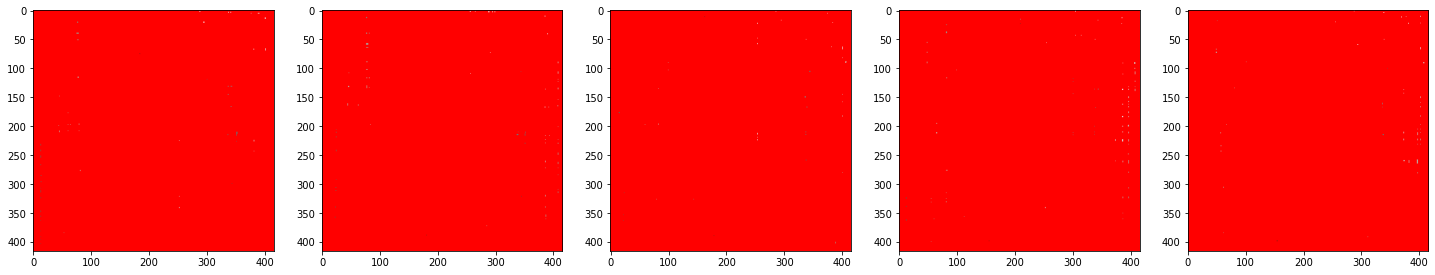

In [4]:

#plot the first five images 
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i, image in enumerate(images):
    ax[i].imshow(image)
plt.show()

fig, ax = plt.subplots(1, 5, figsize = (25, 5))

for i, image in enumerate(images):

    #get outputs
    outputs = image_outputs[i]

    for output in outputs:
        image = object_detection.draw_multiple_boxes(image, output[:, :4])

    ax[i].imshow(image)
    
plt.show()

### Bounding boxes after post process using threshold ###

Let's use a threshold of 0.2.

In [5]:
#predict the first five frames
first_five = data[5][5:10]

#load model
model = object_detection.Model()

#image outputs
processed_outputs = []
class_outputs = []
score_outputs = []
images = []

#predict
for image in first_five:
    #get bbox prediction
    predicted_outputs = model.predict(image)
    bounding_boxes, class_categories, scores = model.post_process(predicted_outputs, score_threshold = 0.2)
    processed_outputs.append(bounding_boxes)
    class_outputs.append(class_categories)
    score_outputs.append(scores)
    
    #transpose image and collect for plotting
    image = np.transpose(image[0], (1, 2, 0))
    images.append(image)


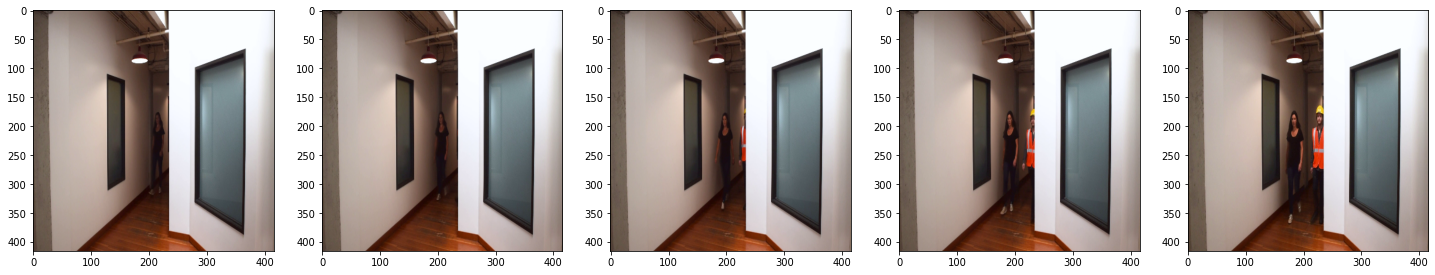

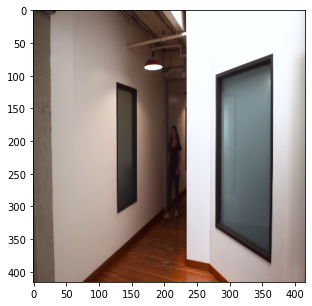

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


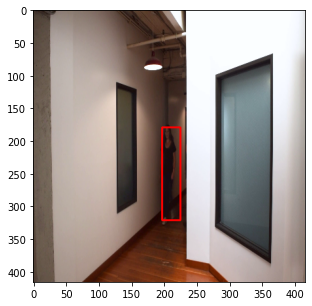

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


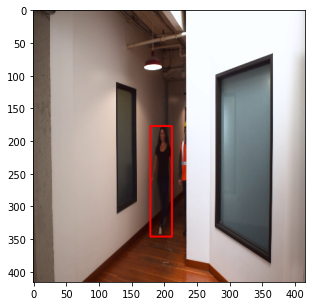

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


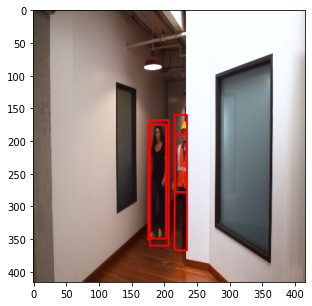

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


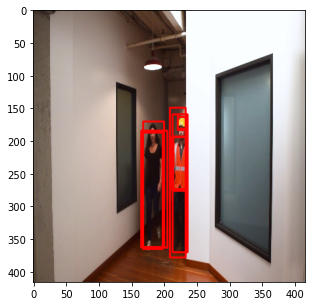

In [50]:

#plot the first five images 
fig, ax = plt.subplots(1, 5, figsize = (25, 5))
for i, image in enumerate(images):
    ax[i].imshow(image)
plt.show()

#post processed bounding boxes
for i, image in enumerate(images):
    plt.figure(figsize = (5, 5))
    if len(processed_outputs[i]) > 0:
        image = object_detection.draw_multiple_boxes(image, processed_outputs[i], class_outputs[i], score_outputs[i])
    plt.imshow(image)
    plt.show()

### Use NMS ot filter out excessive boxes ###

Using a nms_threshold of 0.5 

In [59]:
filtered_outputs = []
filtered_scores = []
filtered_categories = []

for i, processed_output in enumerate(processed_outputs):

    #get filtered outputs usng nms
    indices = nms.filter(processed_output, score_outputs[i], nms_iou_threshold=0.15)
        
    filtered_outputs.append([processed_output[x] for x in indices])
    filtered_scores.append([score_outputs[i][x] for x in indices ])
    filtered_categories.append([class_outputs[i][x] for x in indices])    

#get the labels for each class
filtered_labels = []

for fc in filtered_categories:
    image_labels = []
    for f in fc:
        image_labels.append(model.classes[f])
    
    filtered_labels.append(image_labels)

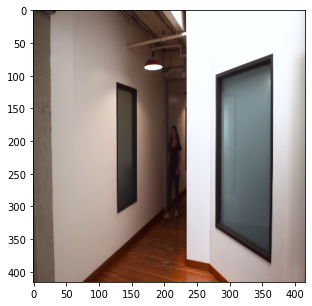

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


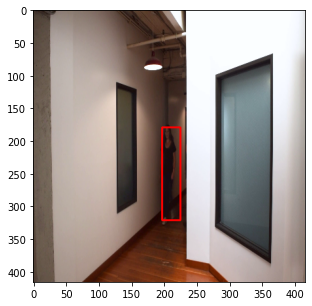

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


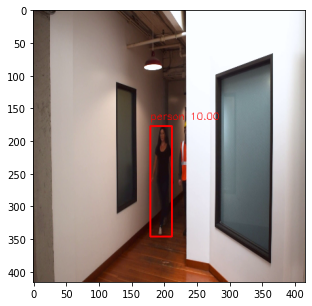

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


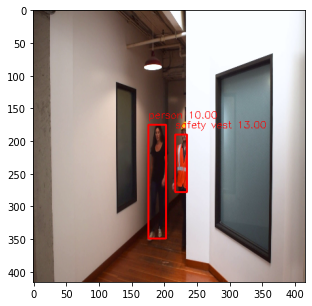

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


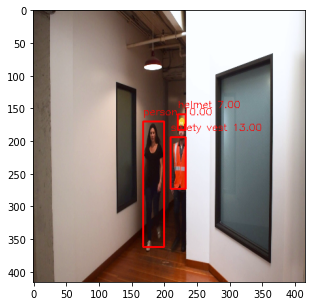

In [63]:
#plot the images.
for i, image in enumerate(images):
    plt.figure(figsize = (5, 5))
    if len(processed_outputs[i]) > 0:
        image = object_detection.draw_multiple_boxes(image, filtered_outputs[i], filtered_categories[i], filtered_scores[i], filtered_labels[i])
    plt.imshow(image)
    plt.show()